<a href="https://colab.research.google.com/github/Penpitcha0634/BSC_DPDM23/blob/main/Project2_Cluster_Analysis_%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%95%E0%B8%B4%E0%B8%A1%E0%B9%81%E0%B8%A5%E0%B9%89%E0%B8%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/seminar & project /Project/project2/project2 มลพิษทางอากาศและปัจจัยที่ส่งผลต่อมลพิษทางอากาศ เติมแล้ว.xlsx'# ระบุเส้นทางของไฟล์ Excel
sheet_name = 'รวมตัวแปรที่เติมแล้ว'# ระบุชื่อ Sheet ที่ต้องการ
#อ่านข้อมูลไฟล์จาก Excel
Air_pollution = pd.read_excel(file_path, sheet_name=sheet_name)
# แสดงข้อมูล
print(Air_pollution.head())

       จังหวัด      ZSO2          ZNO2           ZCO           ZO3     ZPM10  \
0       กระบี่ -0.689794 -1.003260e+00 -2.300000e-07 -2.689200e-01 -3.836360   
1    กาญจนบุรี -0.921480 -7.769000e-01 -1.092340e+00  1.992160e+00  0.644520   
2    กาฬสินธุ์ -0.000003 -2.100000e-07 -2.300000e-07 -3.800000e-07  0.000001   
3  \tกำแพงเพชร -0.216350 -3.242000e-01  9.964000e-02 -7.982100e-01 -1.104120   
4    \tขอนแก่น  3.641037  1.486574e+00  1.069260e-01 -5.802600e-01  1.409550   

         ZPM2.5  Zจำนวนโรงงาน  Zปริมาณกากของเสีย  Zจำนวนครัวเรือน  ...  \
0 -1.732160e+00      -0.54747           -0.53700         -0.58704  ...   
1 -8.953200e-01       0.06925            1.20726          0.14027  ...   
2 -9.300000e-18      -0.03600            2.06492         -0.03049  ...   
3 -1.352970e+00      -0.37718           -0.31658         -0.20052  ...   
4  2.079380e+00       0.86832           -0.19768          1.56115  ...   

    Zฤดูฝน  Zฤดูหนาว  Zปริมาณการใช้ไฟฟ้าครัว  Zปริมาณการใช้ไฟฟ้ากิจก  \
0 

In [10]:
# ลบคอลัมน์ที่ไม่ใช่ตัวเลข (ถ้ามี)
data_numeric = Air_pollution.select_dtypes(include=['number']).dropna()

In [15]:
data_numeric.head(76)

,ZSO2,ZNO2,ZCO,ZO3,ZPM10,ZPM2.5,Zจำนวนโรงงาน,Zปริมาณกากของเสีย,Zจำนวนครัวเรือน,Zอุณหภูมิ,...,Zฤดูฝน,Zฤดูหนาว,Zปริมาณการใช้ไฟฟ้าครัว,Zปริมาณการใช้ไฟฟ้ากิจก,Zปริมาณน้ำมันที่ใช้กับ,Zจำนวนรถตามกฎหมายรถยนต,Zจำนวนรถตามกฎหมายขนส่ง,Zปริมาณขยะมูลฝอยที่เกิ,Zปริมาณขยะมูลฝอยตกค้าง,Zปริมาณพื้นที่สีเขียว
0,-0.689794,-1.003260e+00,-2.300000e-07,-2.689200e-01,-3.836360,-1.732160e+00,-0.54747,-0.53700,-0.58704,0.27183,...,-0.32670,0.82196,-0.375950,-0.39827,-0.42795,-0.45687,-0.63355,-0.44063,-0.30986,-0.42924
1,-0.921480,-7.769000e-01,-1.092340e+00,1.992160e+00,0.644520,-8.953200e-01,0.06925,1.20726,0.14027,0.50796,...,0.27245,0.41622,0.358150,0.00268,0.00492,0.02733,0.35773,-0.16803,-0.14528,0.44250
2,-0.000003,-2.100000e-07,-2.300000e-07,-3.800000e-07,0.000001,-9.300000e-18,-0.03600,2.06492,-0.03049,-0.31850,...,0.18686,-0.53051,-0.285040,-0.41086,-0.50246,-0.30556,-0.16129,-0.03678,-0.20772,-0.37602
3,-0.216350,-3.242000e-01,9.964000e-02,-7.982100e-01,-1.104120,-1.352970e+00,-0.37718,-0.31658,-0.20052,0.46861,...,0.35805,0.21335,-0.253000,-0.31451,-0.46861,-0.10306,0.33205,-0.40866,-0.43292,-0.42829
4,3.641037,1.486574e+00,1.069260e-01,-5.802600e-01,1.409550,2.079380e+00,0.86832,-0.19768,1.56115,-0.27915,...,0.18686,-0.46289,1.222110,0.10635,1.06988,1.66846,1.18920,0.99473,1.49159,1.93157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.000003,-2.100000e-07,-2.300000e-07,-3.800000e-07,0.000001,-9.300000e-18,-0.68621,0.53287,-0.93612,-0.94819,...,-0.58348,-1.00388,-0.914140,-0.55782,-0.74735,-0.88052,-0.92909,-0.66275,-0.14198,-0.31619
72,-0.216350,-3.242000e-01,1.170760e+00,1.319100e-01,-0.448380,1.997000e-02,0.71752,-0.52966,1.00963,-0.16108,...,0.35805,-0.46289,1.009702,-0.03831,0.89332,1.06951,0.64571,1.02839,-0.49217,0.66333
73,-0.921480,-9.785000e-02,-3.084100e-01,1.319100e-01,0.644520,9.352600e-01,-0.62369,-0.53718,-0.70350,-0.00366,...,0.87161,0.41622,-0.590860,-0.51891,-0.65522,-0.42084,-0.70187,-0.56179,-0.49217,-0.37105
74,-0.921480,1.285000e-01,-1.043800e-01,-2.311000e-02,-0.120510,-2.088500e-01,-0.71092,-0.53716,-0.91592,1.72799,...,0.95720,0.88959,-0.752360,-0.55390,-0.76287,-0.71237,-0.63879,-0.86468,-0.49400,-0.43133


In [9]:
# ตรวจสอบชื่อคอลัมน์
print(Air_pollution.columns)

Index(['จังหวัด', 'ZSO2', 'ZNO2', 'ZCO', 'ZO3', 'ZPM10', 'ZPM2.5',
       'Zจำนวนโรงงาน', 'Zปริมาณกากของเสีย', 'Zจำนวนครัวเรือน', 'Zอุณหภูมิ',
       'Zฤดูร้อน', 'Zฤดูฝน', 'Zฤดูหนาว', 'Zปริมาณการใช้ไฟฟ้าครัว',
       'Zปริมาณการใช้ไฟฟ้ากิจก', 'Zปริมาณน้ำมันที่ใช้กับ',
       'Zจำนวนรถตามกฎหมายรถยนต', 'Zจำนวนรถตามกฎหมายขนส่ง',
       'Zปริมาณขยะมูลฝอยที่เกิ', 'Zปริมาณขยะมูลฝอยตกค้าง',
       'Zปริมาณพื้นที่สีเขียว'],
      dtype='object')


In [16]:
X = Air_pollution[['ZSO2', 'ZNO2', 'ZCO', 'ZO3', 'ZPM10', 'ZPM2.5',
       'Zจำนวนโรงงาน', 'Zปริมาณกากของเสีย', 'Zจำนวนครัวเรือน',
       'Zฤดูร้อน', 'Zฤดูฝน', 'Zฤดูหนาว', 'Zปริมาณการใช้ไฟฟ้าครัว',
       'Zปริมาณการใช้ไฟฟ้ากิจก', 'Zปริมาณน้ำมันที่ใช้กับ',
       'Zจำนวนรถตามกฎหมายรถยนต', 'Zจำนวนรถตามกฎหมายขนส่ง',
       'Zปริมาณขยะมูลฝอยที่เกิ', 'Zปริมาณขยะมูลฝอยตกค้าง',
       'Zปริมาณพื้นที่สีเขียว']].values

In [18]:
# การจัดกลุ่มแบบลำดับชั้น (Hierarchical Clustering)
# สร้าง linkage matrix
linkage_matrix = linkage(X, method='single')  # ใช้ Single Linkage


In [19]:
# กำหนดจำนวนกลุ่ม (สมมุติ 2 กลุ่ม)
n_clusters = 2
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

In [20]:
# คำนวณค่า Silhouette
silhouette_vals = silhouette_samples(X, clusters)
silhouette_avg = silhouette_score(X, clusters)

In [21]:
print(silhouette_avg)

0.5134250651669474


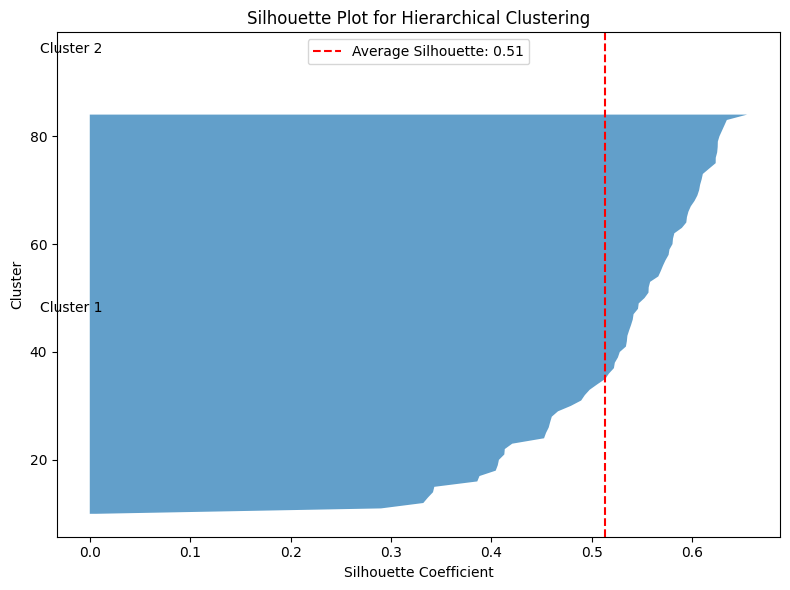

In [22]:
# สร้างกราฟ Silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(1, n_clusters + 1):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), f"Cluster {i}")
    y_lower = y_upper + 10

# เส้นค่าเฉลี่ย Silhouette
plt.axvline(silhouette_avg, color="red", linestyle="--", label=f"Average Silhouette: {silhouette_avg:.2f}")
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.tight_layout()
plt.show()

ตรวจสอบว่าทำไมแท่ง Cluster1 ถึงไม่ขึ้น หากเป็น 0 แสดงว่าไม่มีค่าข้อมูลอยู่เลย

In [23]:
print(np.sum(clusters == 1))

75


Cluster 1 มีค่า silhouette ใกล้ 0 หรือค่าติดลบ ทำให้กราฟแท่งเล็กมากจนมองไม่เห็นหรือไม่ ต้องทำการตรวจสอบโดยการ

In [26]:
print(silhouette_vals[clusters == 1])

[0.45707156 0.5580784  0.54667841 0.60509342 0.38812731 0.54074911
 0.53394909 0.29004337 0.62483584 0.63203101 0.62343026 0.40632601
 0.00650706 0.54156518 0.51334527 0.41332351 0.55667426 0.48937611
 0.33216504 0.45851803 0.57087378 0.46012713 0.5808341  0.40429168
 0.46629189 0.34182472 0.47909385 0.6253573  0.59857356 0.62335328
 0.5459799  0.50544529 0.57646094 0.61691648 0.52289551 0.58968492
 0.65467917 0.59617985 0.57732669 0.58034918 0.62550573 0.49789682
 0.45439872 0.56621443 0.55249864 0.60228269 0.55642221 0.42075775
 0.41285983 0.59473728 0.53542754 0.56867071 0.38591574 0.63445077
 0.4930339  0.52783114 0.53717166 0.34312769 0.58217513 0.33671703
 0.62713888 0.52199861 0.57338523 0.59409338 0.6295998  0.52601483
 0.60938585 0.51703257 0.40746471 0.6068811  0.4524187  0.5390703
 0.60784278 0.61055931 0.53489603]


ทำ Dendrogram

In [30]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# สร้าง linkage matrix สำหรับ hierarchical clustering
linked = sch.linkage(X, method='single')  # 'single linkage'

# สร้างและ plot Dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linked, labels='จังหวัด', leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("จังหวัด")
plt.ylabel("Distance")
plt.show()

ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1200x600 with 0 Axes>

In [31]:
#ตรวจสอบข้อมูลที่ใช้ทำ Clustering
print(f"จำนวนข้อมูล: {len(data)}")

NameError: name 'data' is not defined